Import libraries

In [41]:
import numpy as np #number manipulaiton
import matplotlib.pyplot as plt #plot visualization
import pandas as pd #dataset manipulation

Load the dataset

In [42]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values #independend variables
y = dataset.iloc[:, -1].values #dependend variables

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Train linear regression model for comparison

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

Train Polynomial Regression model

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression()

Visualize both models

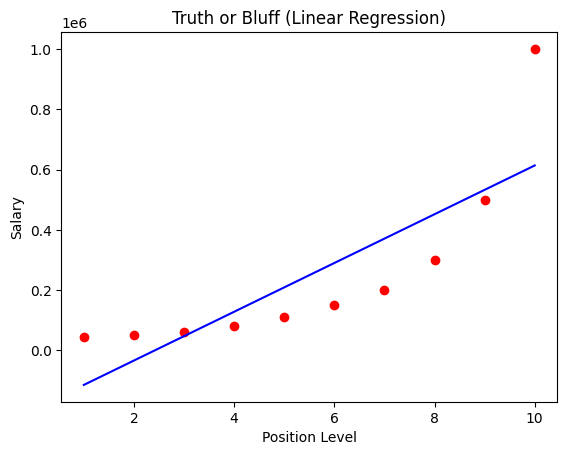

In [46]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Linear regression model is straightforward and generally does not fit to the actual values

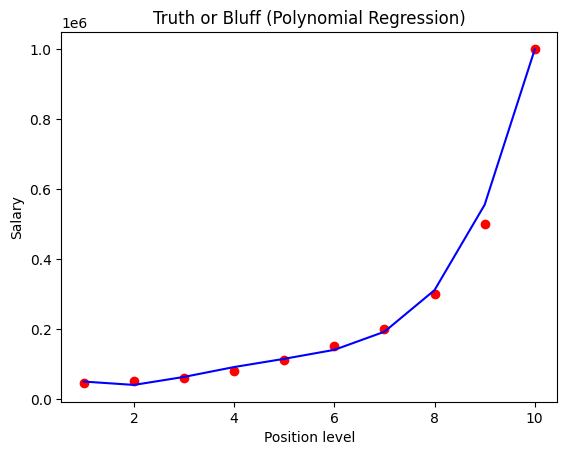

In [47]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Polynomial regression fits the actual values almost perfectly

C:\Users\Admin\AppData\Local\Temp\ipykernel_3872\3061864919.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


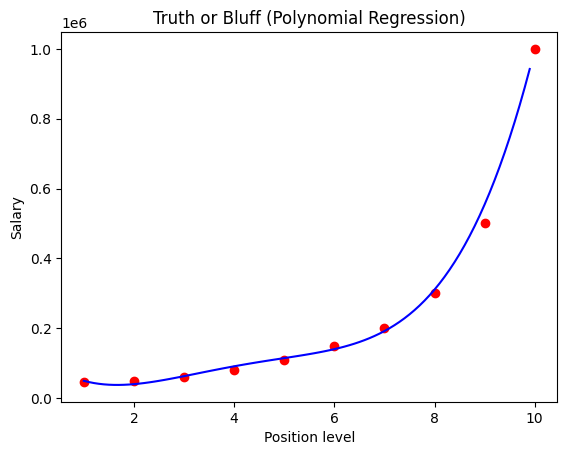

In [48]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Let's apply a new independend variable to test the prediction
for X = 6.5 the approximate y should be about 160,000

In [49]:
lin_reg.predict([[6.5]])

array([330378.79])

linear regression is extremely inaccurate in this case, off by double of the original value

In [50]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([160454.6])

In [51]:
y_pred = lin_reg_2.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[ 62618.49  60000.  ]
 [554488.62 500000.  ]]


polynomial regression result is extremely close to the expected 160,000 value

In [52]:
from sklearn.metrics import r2_score
r2_score(y, y_pred_lin)

0.6690412331929895

Accuracy of linear regression is not even 70%, which means this model is not good for this dataset

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9692575841570868

Accuracy of polynomial regression is very good and is very close to 100%, which means this model is for sure a better option than linear regression model.